In [ ]:
#Week 5
#Decision Tree Classifier
#SID: 2305603

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Rows Columns
(54035, 9)
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  

 class
1    29675
0    24360
Name: count, dtype: int64


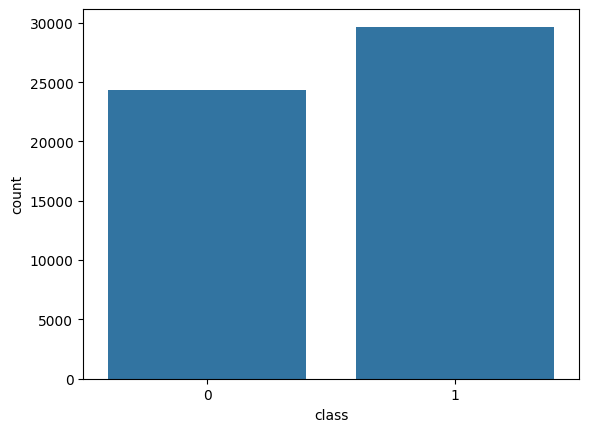

In [3]:
#Read and Display Data Set

#First, read in CSV and assign it to a variable called "data"
data = pd.read_csv("poisonous_or_edible_mushrooms.csv")

#Second, display maximum rows and columns
print('\nRows Columns') #Indicates rows and columns
print(data.shape) #gets the number of rows and columns of data set

pd.set_option('display.max_columns', None) #optional setting to show all feature columns

#Third, display first five rows to check data
print(data.head(5))

#Select last column (assuming the last column is the class)
last_column = data.iloc[:, -1] #using iloc to select the last column

#Count occurences of 0's and 1's
value_counts = last_column.value_counts()

#Print the value counts and check for imbalance
print('\n' , value_counts)

sns.countplot(x="class", data=data)
plt.show()

Axes(0.125,0.11;0.62x0.77)


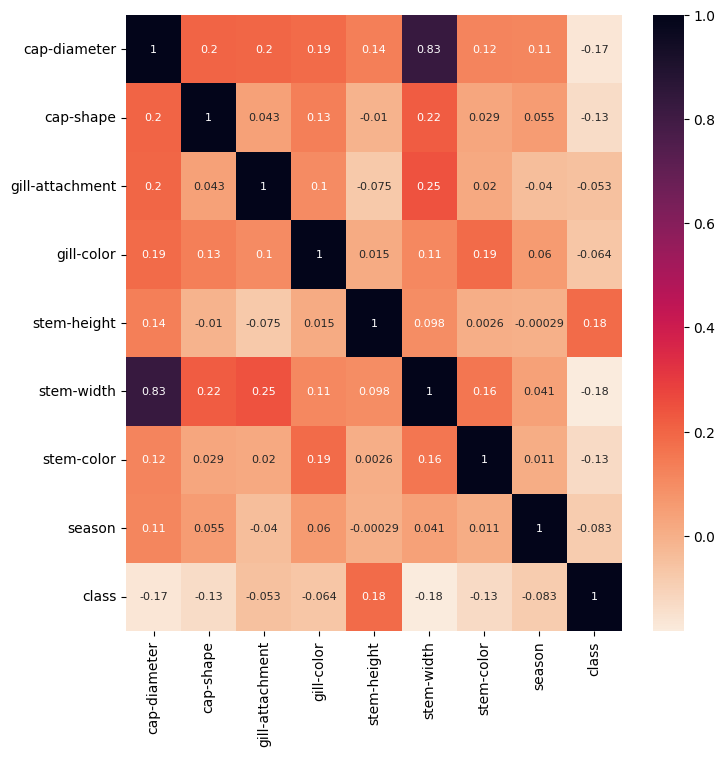

In [6]:
#Display Feature Relations of Data Set
plt.figure(figsize=(8,8)) #Adjust width and height
print(sns.heatmap(data.corr(),annot=True, annot_kws={"size":8}, cmap= sns.cm.rocket_r))

In [7]:
#Declare X and Y Variables and Split the Dataset into Train and Test sections
X=data.drop(['class'], axis=1).values #X Variables = all common except the last one

#Declare last column to be the Dependent variable Y
y=data['class'].values #Y Variable = last column

#Split Data Set 70% training and 30% Testing. Initial data shuffle to zero
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=0)

In [8]:
#Create and Test the Model

#First, declare a new model
classifier_model = DecisionTreeClassifier()

#Second, Train (fit) the model from the training data
classifier_model.fit(X_train, y_train)

#Fourth, Test the model using the testing data
y_pred = classifier_model.predict(X_test)
print('\nTest Data Model = ', y_pred)


Test Data Model =  [1 1 0 ... 0 1 1]


In [14]:
#Evaluate Model
print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy = ', accuracy_score(y_test, y_pred))
print('\nPrecision = ', precision_score(y_test, y_pred))
print('\nRecall = ', recall_score(y_test, y_pred))
print('\nF1 Score = ', f1_score(y_test, y_pred))

#Print out shape of tree
#from sklearn.tree import _tree, plot_tree
#plt.figure('Decision Tree', figsize=(70,40))
#plot_tree(classifier_model, filled=True, rounded=True, fontsize=14, feature_names=data.columns, class_names=['Poisonous','Edible'])
#plt.show()


Confusion Matrix = 
 [[7120  185]
 [ 203 8703]]

Accuracy =  0.9760656344457467

Precision =  0.9791854185418541

Recall =  0.9772063777228834

F1 Score =  0.9781948971563449


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.711 total time=   0.1s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.705 total time=   0.1s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.706 total time=   0.1s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.711 total time=   0.1s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.705 total time=   0.1s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.706 total time=   0.1s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.711 total time=   0.1s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.705 total time=   0.1s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.706 total time=   0.1s
[CV 1/3] END max_depth=5, min_samples_leaf=2

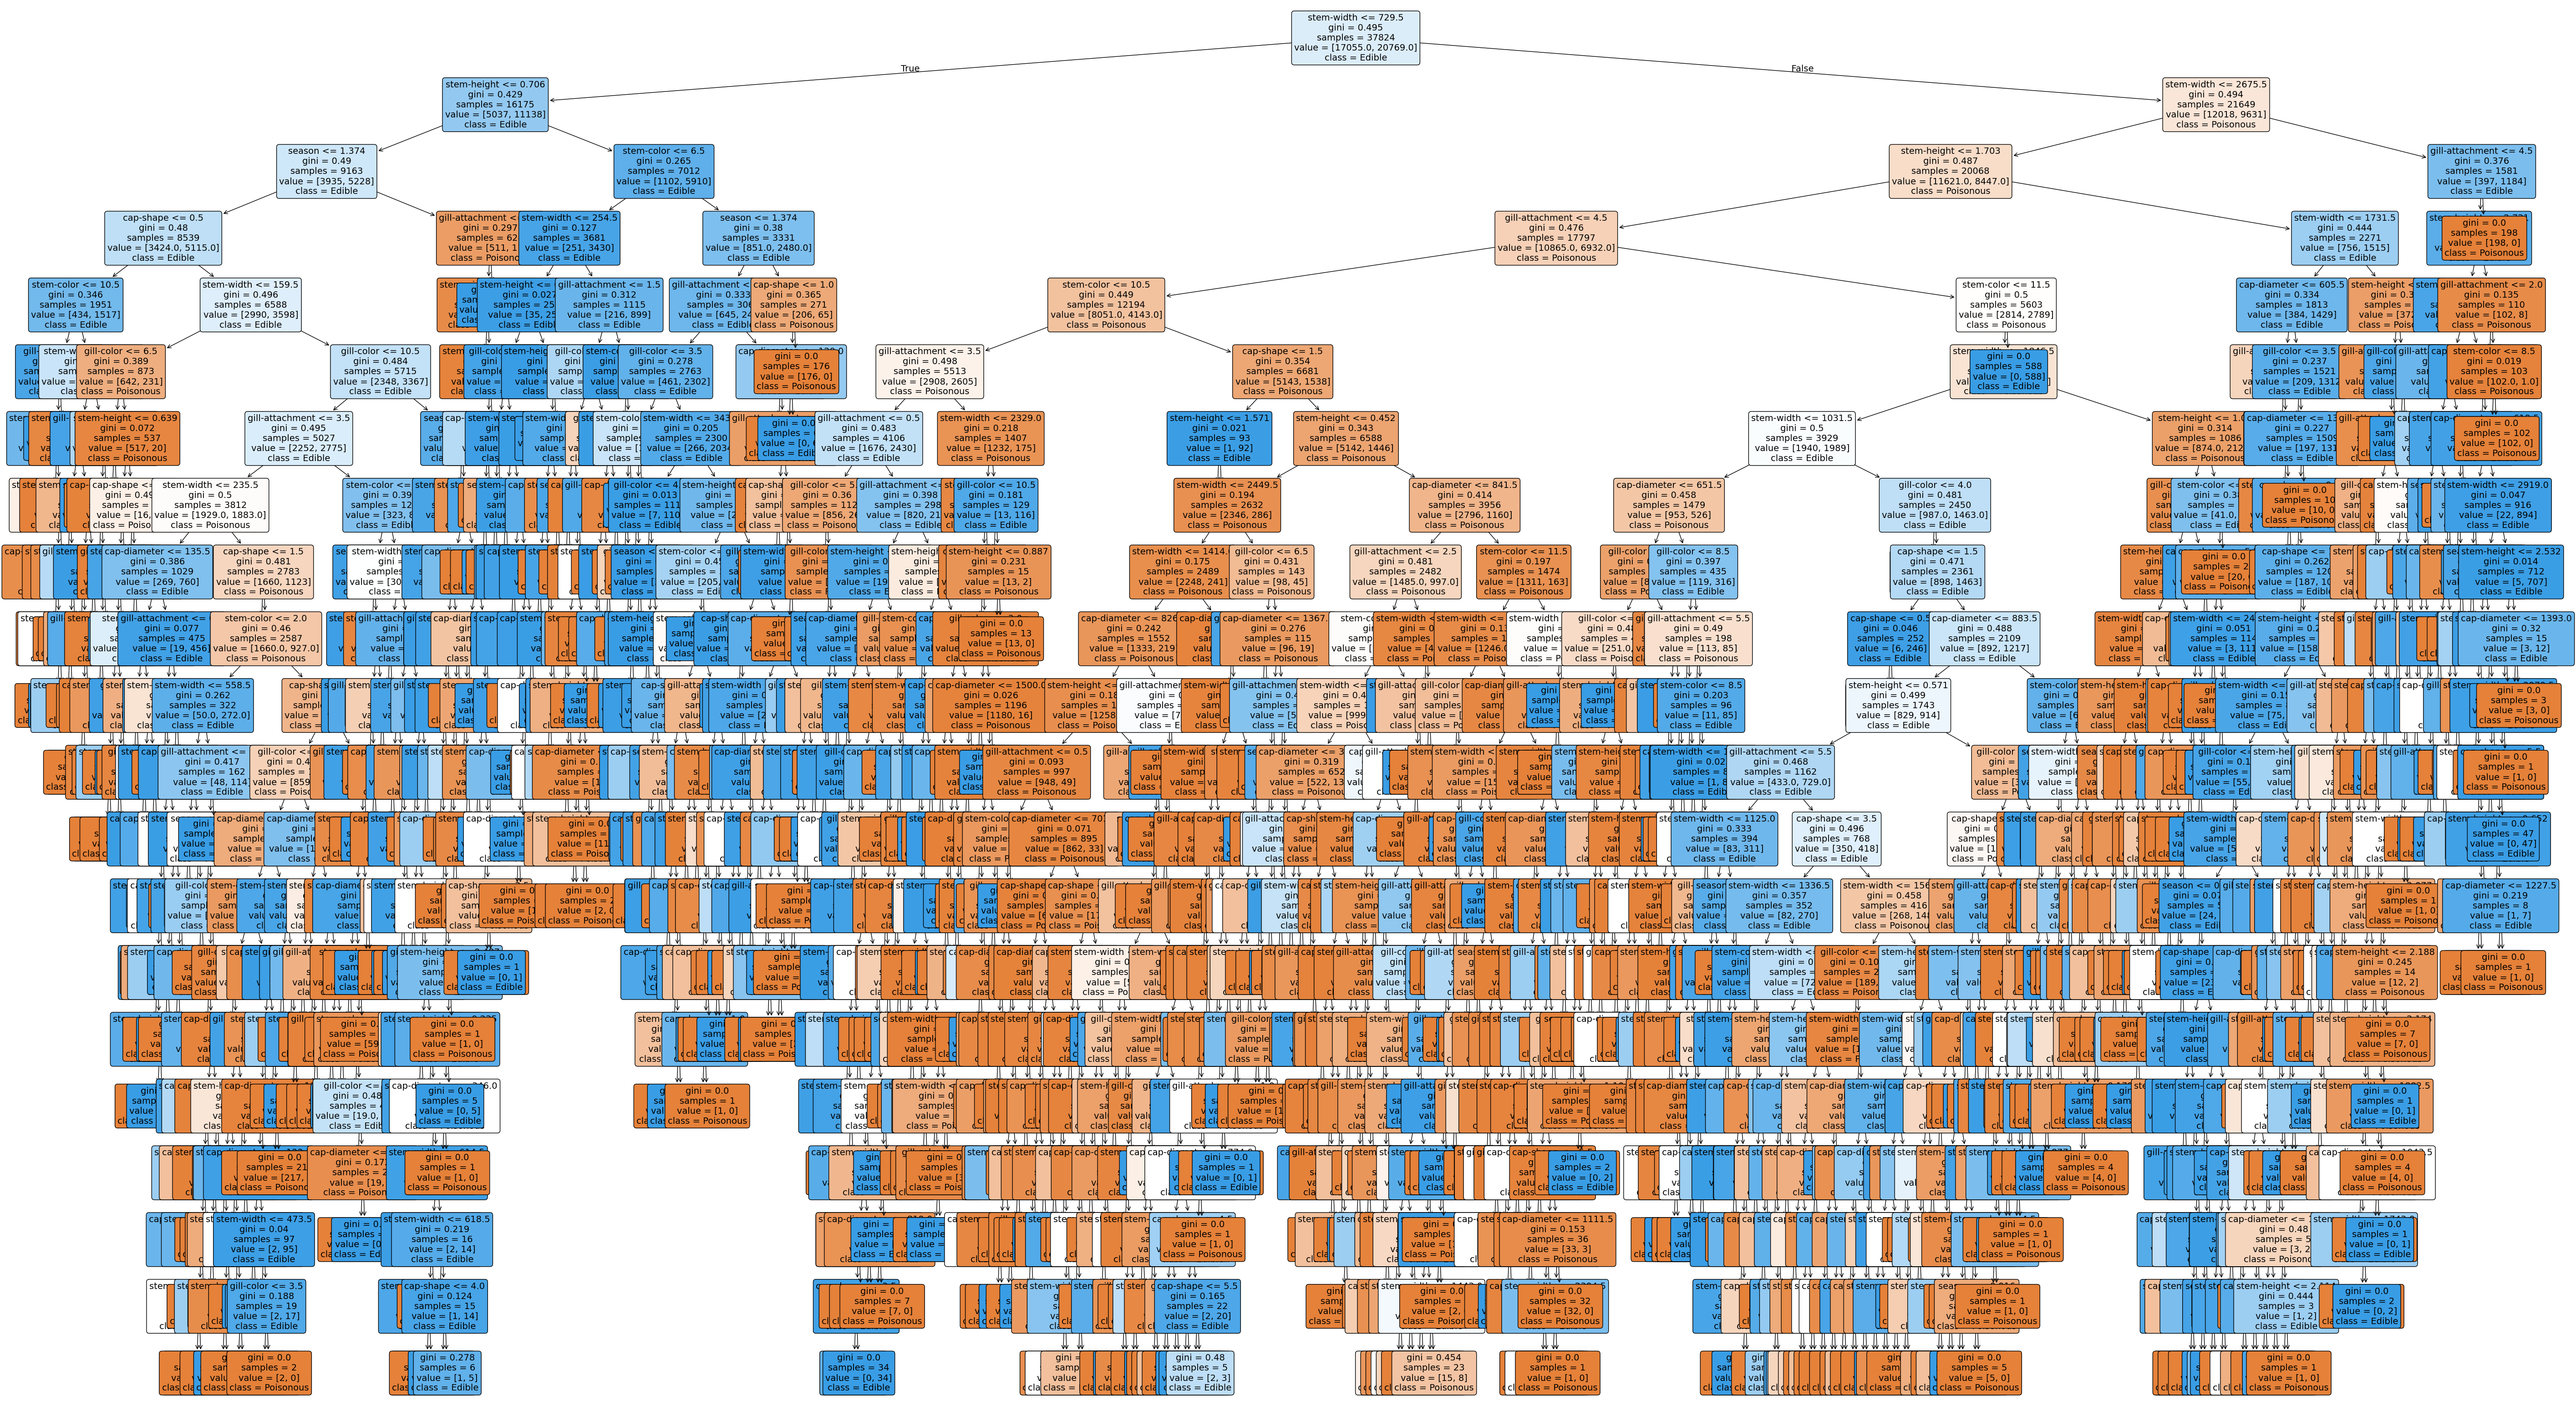

In [ ]:
#Optimising Model for better metrics

param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid,verbose=3, cv=3) #'Verbose' = Added information in Grid Search. 1 = Little, 2 = Average, 3 = Full info
grid.fit(X_train, y_train)
grid.best_params_
grid_predictions = grid.predict(X_test)

#Evaluate Model
print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy = ', accuracy_score(y_test, y_pred))
print('\nPrecision = ', precision_score(y_test, y_pred))
print('\nRecall = ', recall_score(y_test, y_pred))
print('\nF1 Score = ', f1_score(y_test, y_pred))

#Print out shape of tree
from sklearn.tree import _tree, plot_tree
plt.figure('Decision Tree', figsize=(70,40))
plot_tree(classifier_model, filled=True, rounded=True, fontsize=14, feature_names=data.columns, class_names=['Poisonous','Edible'])
plt.show()